In [1]:
%reload_ext autoreload
%autoreload 2

In [4]:
from ripple_heterogeneity.utils import (
    functions,
    loading,
    batch_analysis,
    add_new_deep_sup,
)
from ripple_heterogeneity.assembly import assembly_reactivation,find_sig_assembly
from ripple_heterogeneity.readout import assembly_multi_region
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nelpy as nel
# import nelpy.plotting as npl
from matplotlib.ticker import AutoMinorLocator
import os
from scipy import stats
from statannot import add_stat_annotation

functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

In [95]:
basepath = r"Z:\Data\ORproject\OR15\hc300118"


In [96]:
manipulation_epochs = loading.load_manipulation(
    basepath, struct_name="optoStim",return_epoch_array=False
)

display(manipulation_epochs)

manipulation_epochs = loading.load_manipulation(
    basepath, struct_name="optoStim",return_epoch_array=True
)

display(manipulation_epochs)

,start,stop,peaks,center,duration,amplitude,amplitudeUnits,ev_label
0,3.41255,3.51255,3.46255,3.46255,0.1,NaN,au,closed_loop
1,10.43515,10.53515,10.48515,10.48515,0.1,NaN,au,closed_loop
2,22.50845,22.60845,22.55845,22.55845,0.1,NaN,au,closed_loop
3,34.28070,34.38070,34.33070,34.33070,0.1,NaN,au,closed_loop
4,37.22515,37.32515,37.27515,37.27515,0.1,NaN,au,closed_loop
...,...,...,...,...,...,...,...,...
4747,21327.19765,21327.29765,21327.24765,21327.24765,0.1,NaN,au,delayed
4748,21366.13200,21366.23200,21366.18200,21366.18200,0.1,NaN,au,delayed
4749,21491.72590,21491.82590,21491.77590,21491.77590,0.1,NaN,au,delayed
4750,21510.06840,21510.16840,21510.11840,21510.11840,0.1,NaN,au,delayed


{'closed_loop': <EpochArray at 0x1ed090dcb50: 3,646 epochs> of length 6:04:600 minutes,
 'delayed': <EpochArray at 0x1ed09cefcd0: 1,106 epochs> of length 1:50:600 minutes}

In [97]:
st,cm = loading.load_spikes(basepath,putativeCellType="Pyr",brainRegion="CA1")
cm = add_new_deep_sup.deep_sup_from_deepSuperficialDistance(cm)


In [98]:
fr_mat = functions.get_participation(st.data,manipulation_epochs['closed_loop'].starts, manipulation_epochs['closed_loop'].stops,par_type="binary")

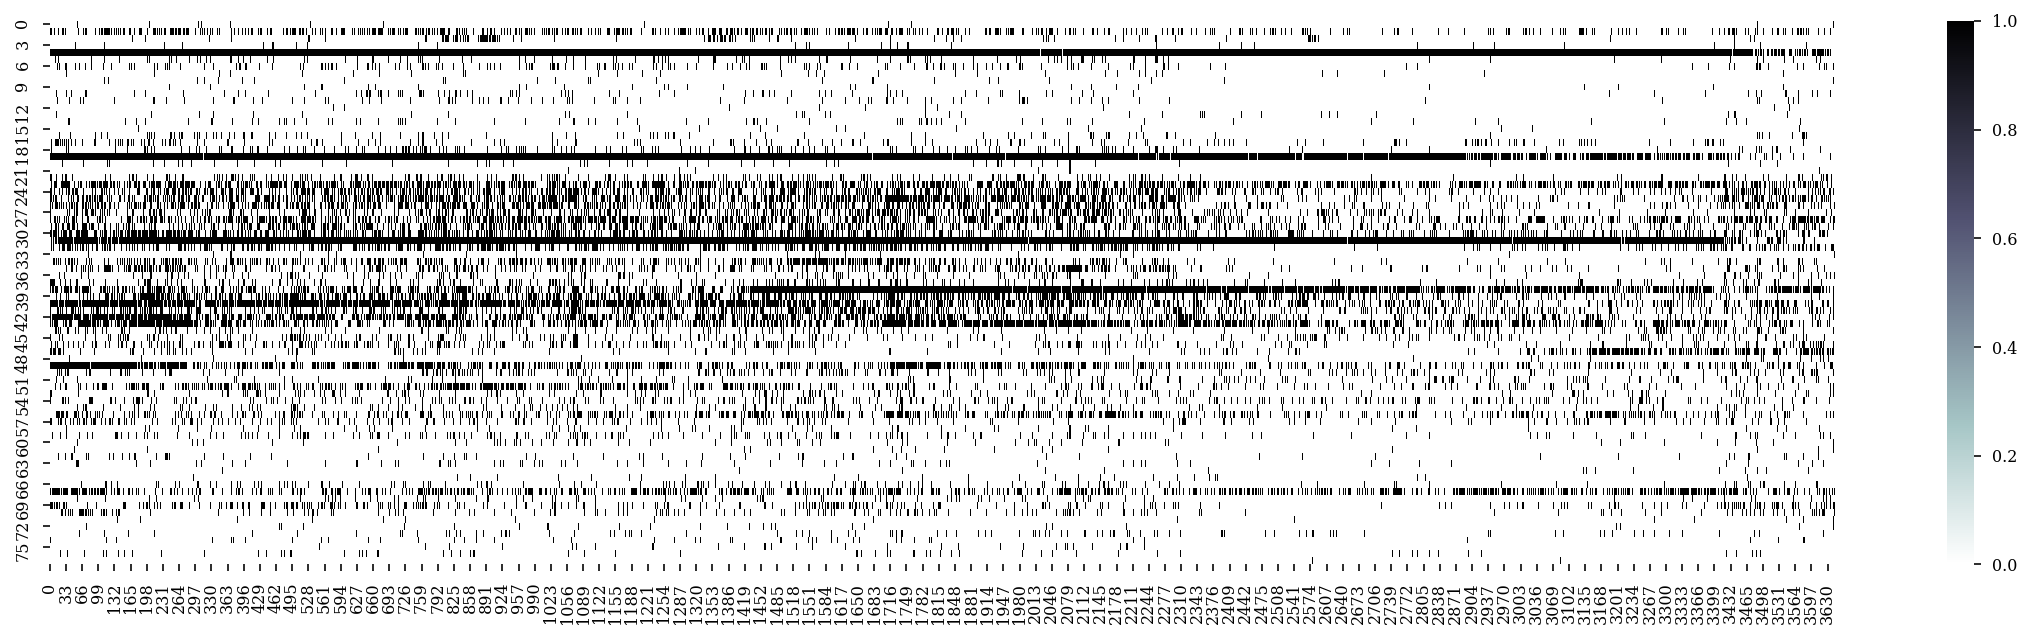

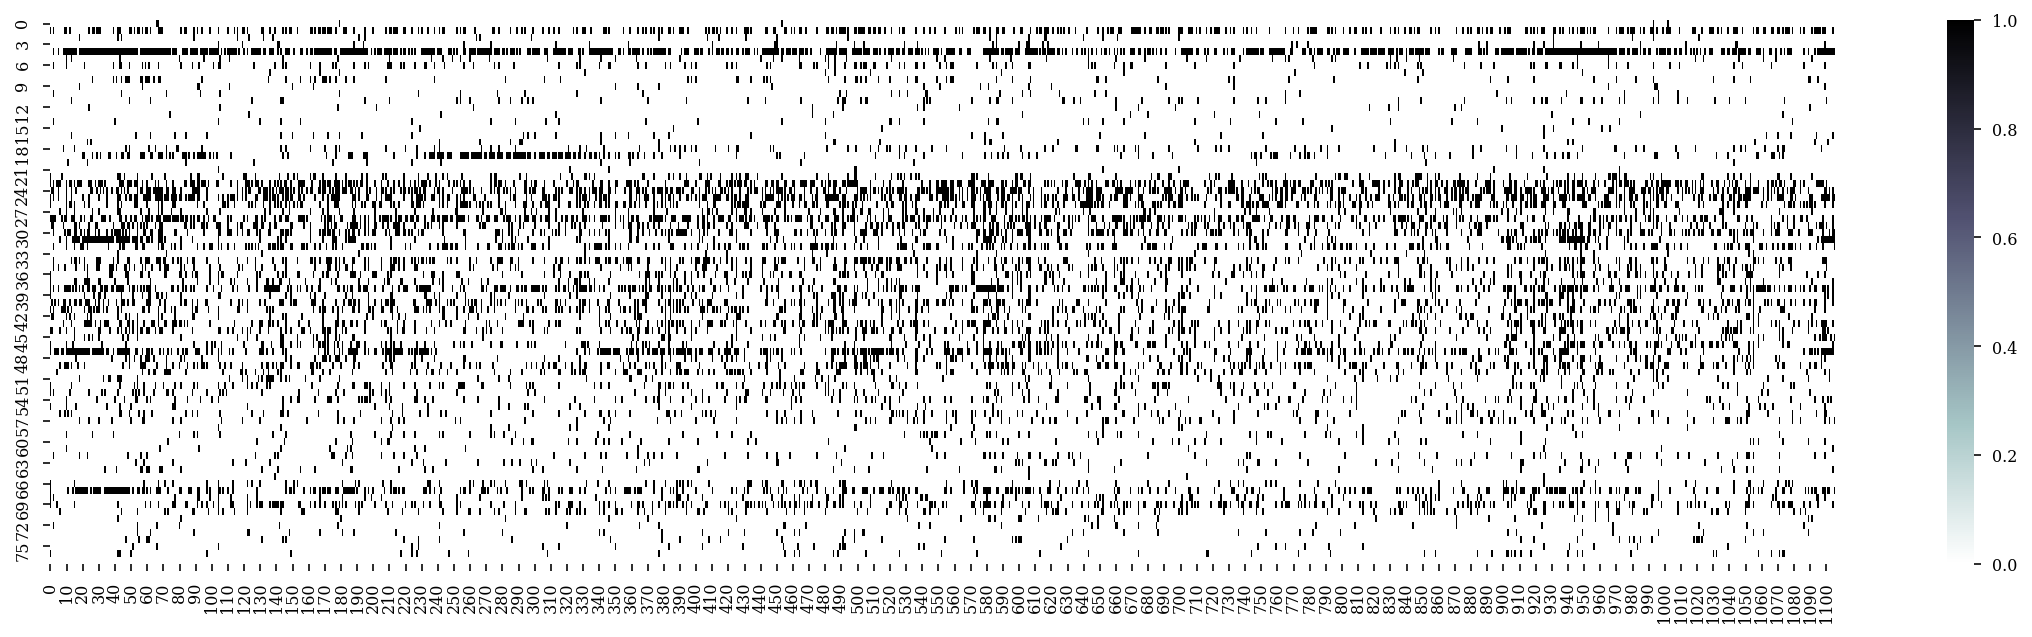

In [107]:
closed_loop = functions.get_participation(st.data,manipulation_epochs['closed_loop'].starts, manipulation_epochs['closed_loop'].stops,par_type="binary")
plt.figure(figsize=(20,5))
sns.heatmap(closed_loop,cmap="bone_r")
plt.show()

delayed = functions.get_participation(st.data,manipulation_epochs['delayed'].starts, manipulation_epochs['delayed'].stops,par_type="binary")
plt.figure(figsize=(20,5))
sns.heatmap(delayed,cmap="bone_r")
plt.show()

In [100]:
df = pd.DataFrame()
df['participation'] = np.hstack([closed_loop.mean(axis=1),delayed.mean(axis=1)])
df['stim_type'] = np.hstack([np.repeat('closed_loop',closed_loop.shape[0]),np.repeat('delayed',delayed.shape[0])])
df['deepSuperficial'] = np.hstack([cm.deepSuperficial,cm.deepSuperficial])
df['deepSuperficialDistance'] = np.hstack([cm.deepSuperficialDistance,cm.deepSuperficialDistance])

df

,participation,stim_type,deepSuperficial,deepSuperficialDistance
0,0.006308,closed_loop,Deep,-145.736540
1,0.271530,closed_loop,Deep,-165.686232
2,0.052386,closed_loop,middle,-28.817655
3,0.016731,closed_loop,Deep,-195.604452
4,0.978881,closed_loop,Deep,-145.604452
...,...,...,...,...
151,0.038879,delayed,middle,-28.817655
152,0.036166,delayed,Deep,-115.736540
153,0.028029,delayed,middle,11.182345
154,0.046112,delayed,Deep,-155.604452


<AxesSubplot:xlabel='stim_type', ylabel='participation'>

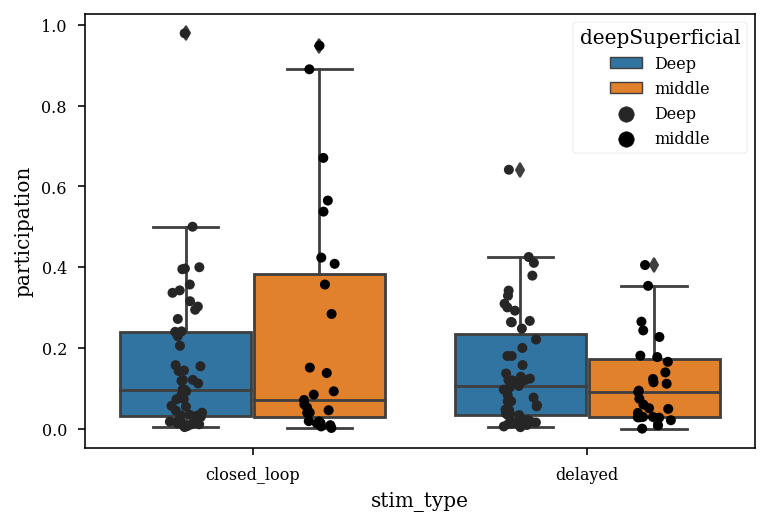

In [101]:
sns.boxplot(x='stim_type',y='participation',hue="deepSuperficial",data=df)
sns.stripplot(x='stim_type',y='participation',hue="deepSuperficial",data=df,dodge=True,color="black")

<AxesSubplot:xlabel='deepSuperficialDistance', ylabel='participation'>

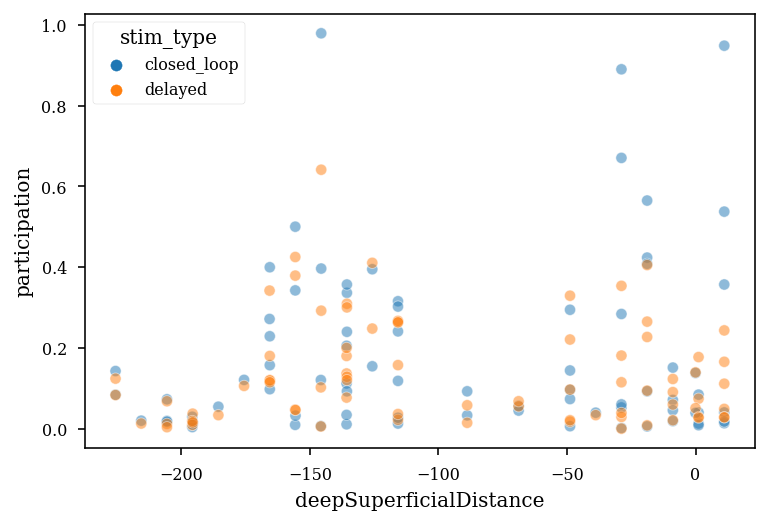

In [103]:
sns.scatterplot(x='deepSuperficialDistance',y='participation',hue='stim_type',data=df,alpha=0.5)

(0.0, 1.0)

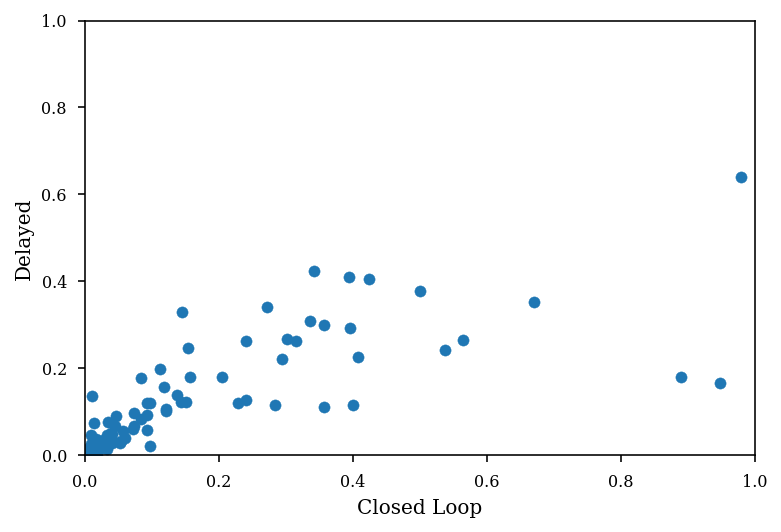

In [104]:
plt.scatter(closed_loop.mean(axis=1),delayed.mean(axis=1))
plt.xlabel("Closed Loop")
plt.ylabel("Delayed")
plt.xlim([0,1])
plt.ylim([0,1])

In [ ]:
pearson = np.corrcoef(closed_loop,delayed)

sns.heatmap(pearson,cmap="RdBu_r",vmin=-.5,vmax=.5)